In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
#from pandas_datareader.data import DataReader
   
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

DE_Data = pd.read_csv('./DELL_stock_history.csv',sep='\t')

In [10]:
DE_Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [11]:
DE_Data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-08-17 00:00:00-04:00,11.636467,11.770219,11.502714,11.502714,271519,0,0.0
1,2016-08-18 00:00:00-04:00,11.770218,11.770218,11.368961,11.435837,1767366,0,0.0
2,2016-08-19 00:00:00-04:00,11.422462,11.636466,11.409087,11.636466,4735900,0,0.0
3,2016-08-22 00:00:00-04:00,11.502714,12.198227,11.395712,11.676593,2245909,0,0.0
4,2016-08-23 00:00:00-04:00,11.703343,12.278478,11.636466,12.037724,1483020,0,0.0


## Overall graphs

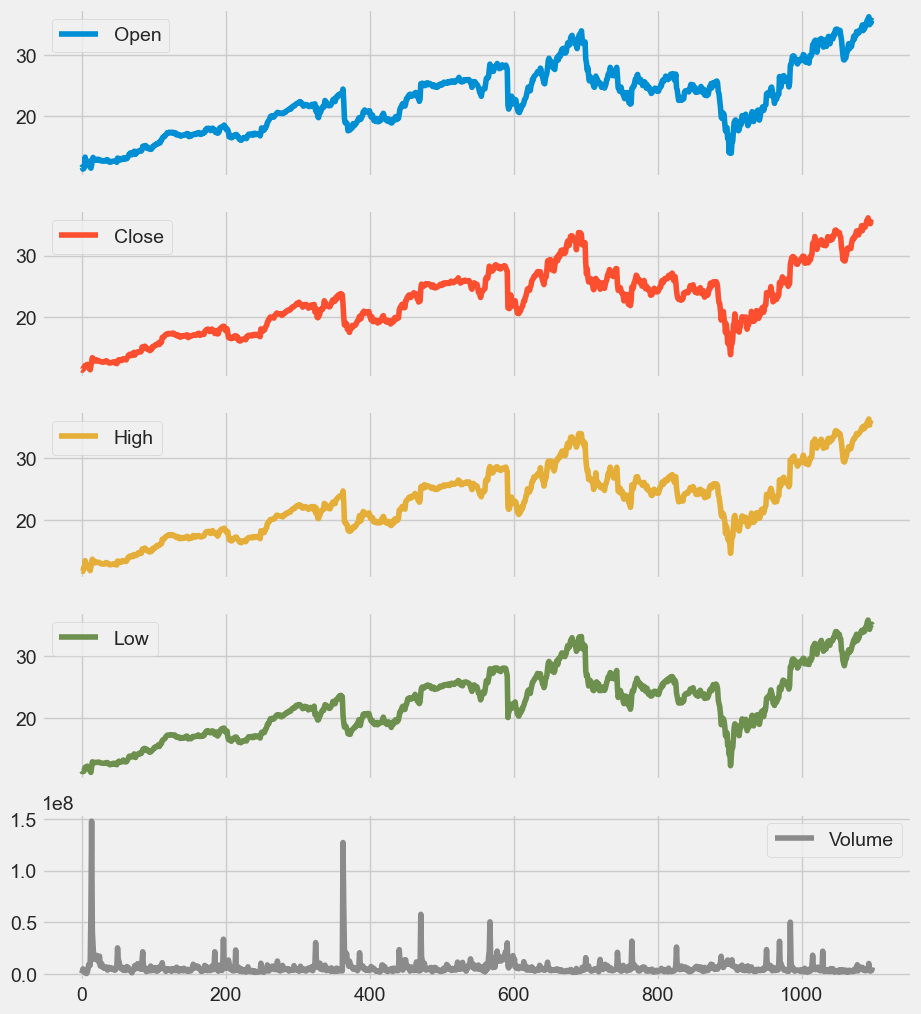

In [27]:
DE_Data[['Open', 'Close', 'High', 'Low', 'Volume']].plot(subplots = True, figsize = (10,12))
plt.show()

## Open/Close Data graph

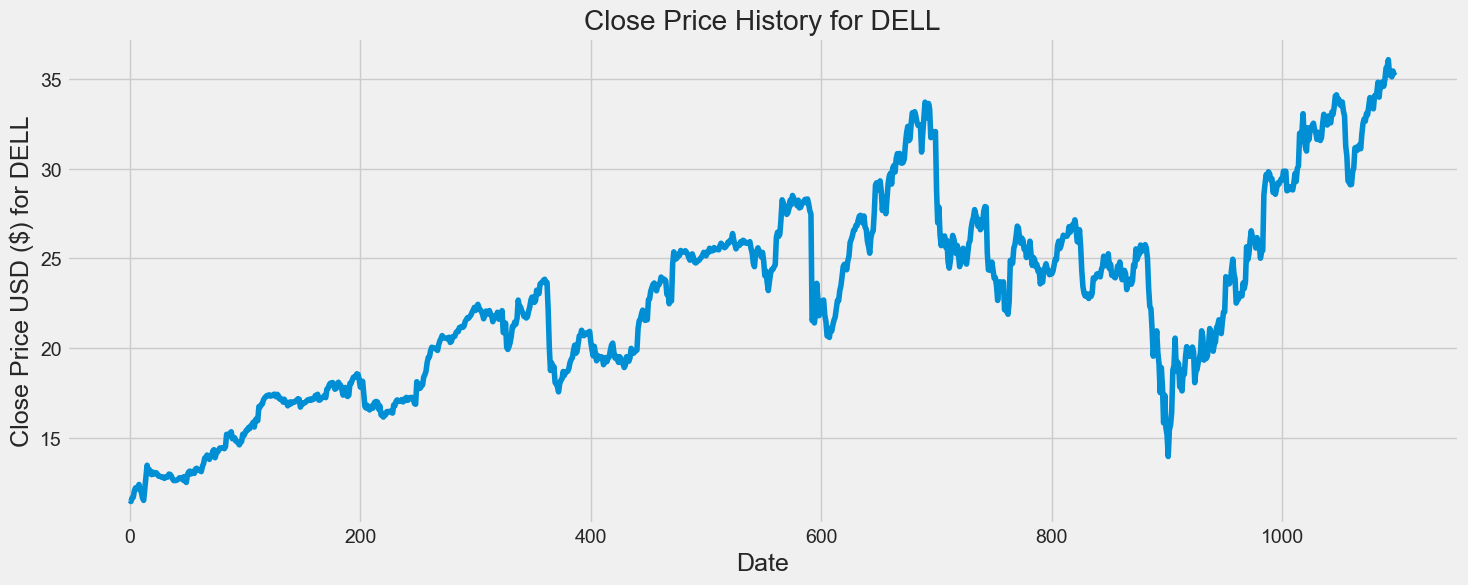

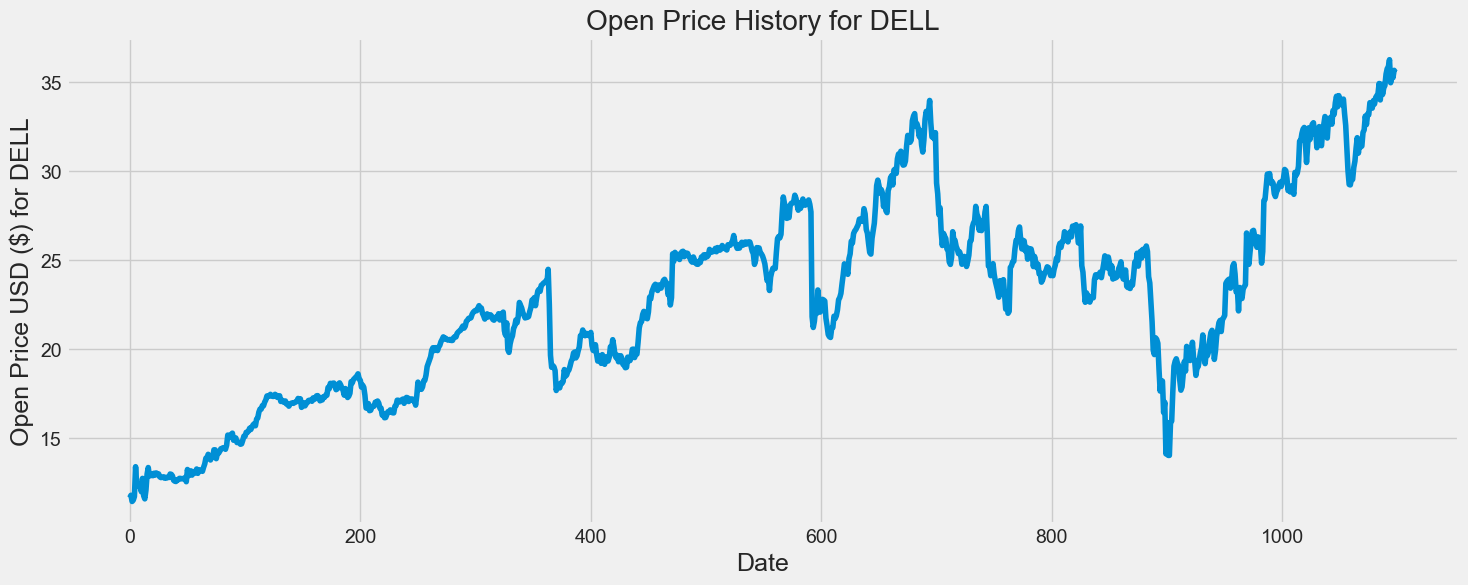

In [13]:
def plot_stock_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_stock_val(DE_Data, 'Close', 'DELL')
plot_stock_val(DE_Data, 'Open',  'DELL')

## MACD Graph

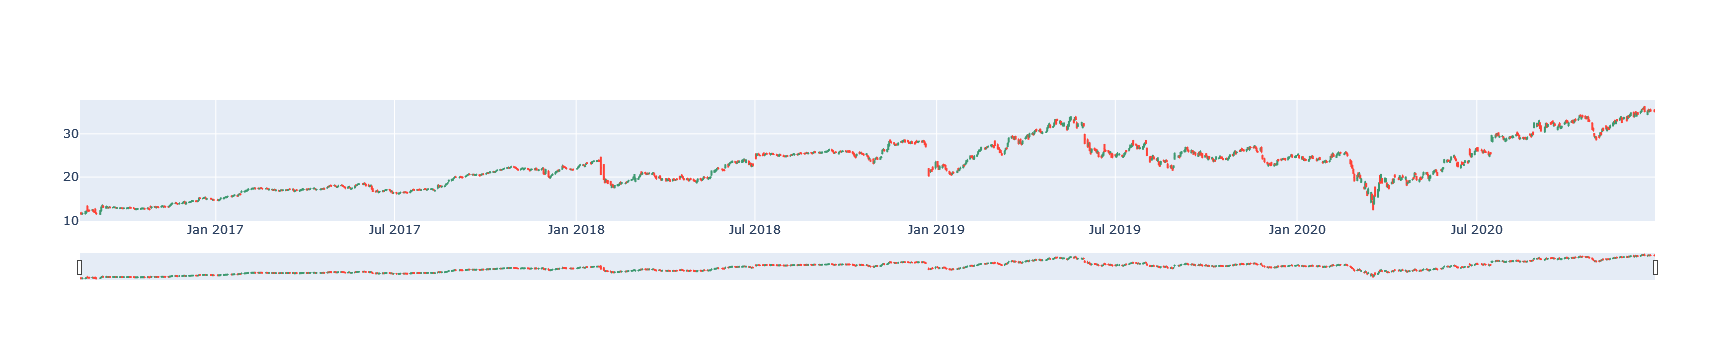

In [23]:
import plotly.graph_objects as go
#DE_Data=DE_Data.reset_index()


fig = go.Figure(data=go.Ohlc(x=DE_Data['Date'],
        open=DE_Data['Open'],
        high=DE_Data['High'],
        low=DE_Data['Low'],
        close=DE_Data['Close']))
fig.show()

## Stohastic Oscillator

In [33]:
#Create the "L14" column in the DataFrame
sth_df = pd.DataFrame()
sth_df['L14'] = DE_Data['Low'].rolling(window=14).min()
#Create the "H14" column in the DataFrame
sth_df['H14'] = DE_Data['High'].rolling(window=14).max()
#Create the "%K" column in the DataFrame
sth_df['%K'] = 100*((DE_Data['Close'] - sth_df['L14']) / (sth_df['H14'] - sth_df['L14']) )
#Create the "%D" column in the DataFrame
sth_df['%D'] = sth_df['%K'].rolling(window=3).mean()
sth_df.dropna(axis=0, inplace=True)
sth_df.head()

,L14,H14,%K,%D
15,11.240558,13.613328,93.461076,70.460306
16,11.240558,13.613328,79.594119,82.664203
17,11.240558,13.613328,83.201793,85.418996
18,11.240558,13.613328,73.055170,78.617027
19,11.240558,13.613328,71.364112,75.873692


Text(0.5, 1.0, 'Oscillator')

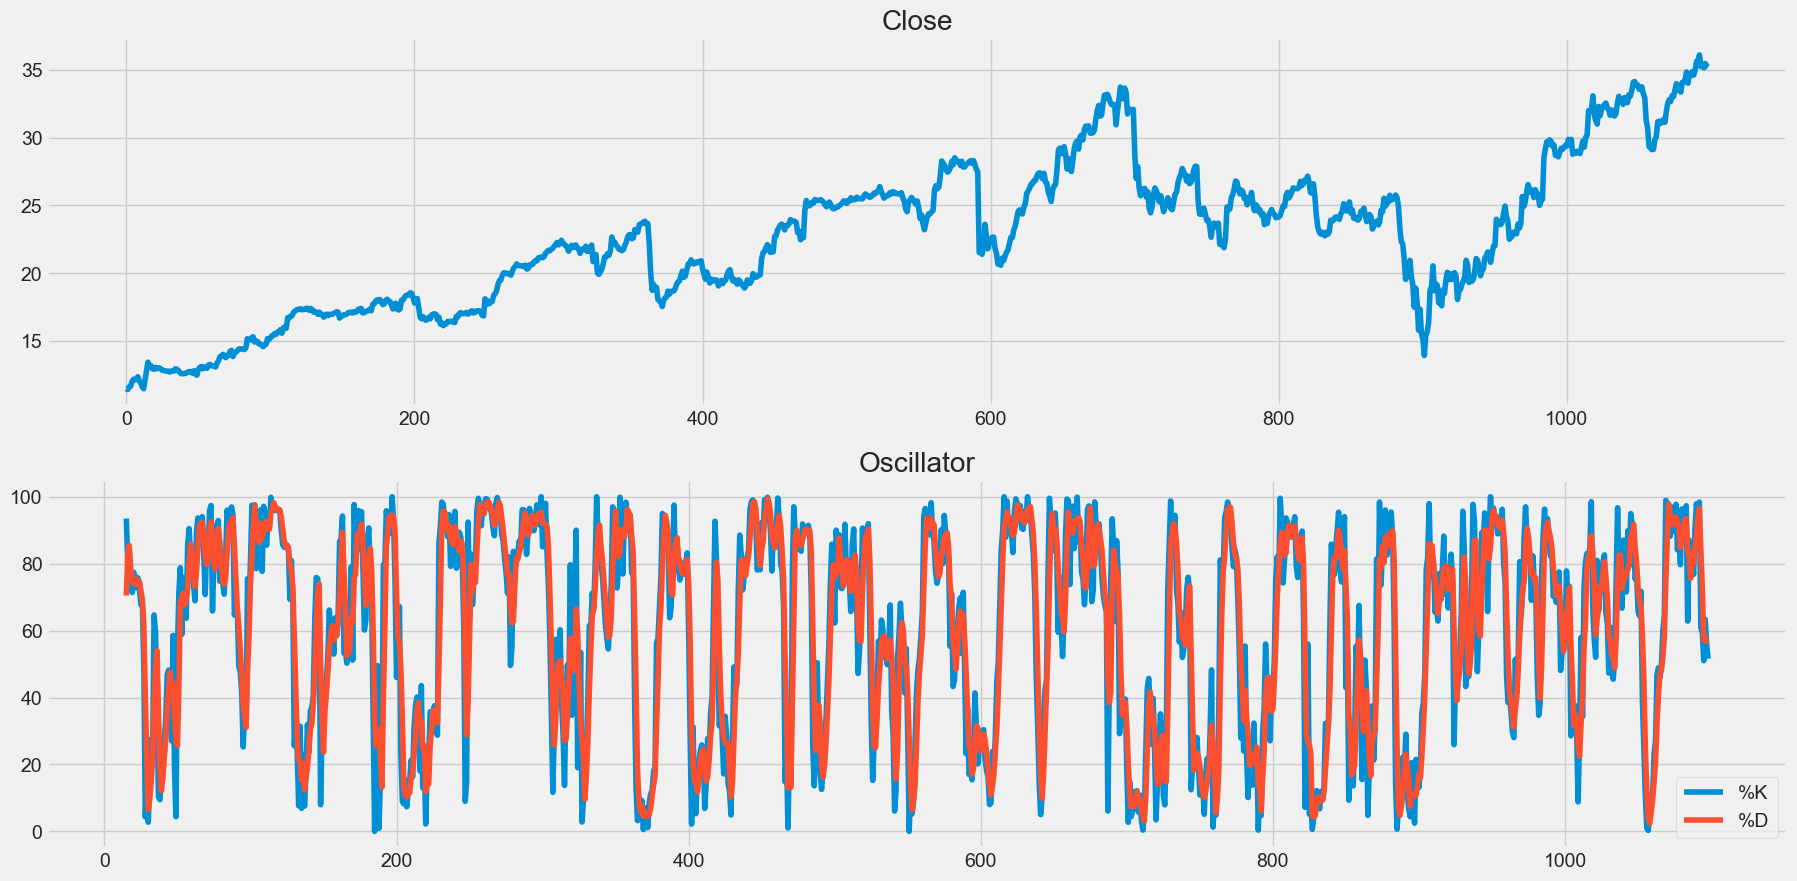

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
DE_Data['Close'].plot(ax=axes[0]); axes[0].set_title('Close')
sth_df[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')